数据集：data/ex7faces.mat

要求：将特征降至 k = 36 维

## 1.导入数据集

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
mat = sio.loadmat('data/ex7faces.mat')
X = mat['X']
X.shape

(5000, 1024)

## 2.可视化前100个人脸原始图像：

In [3]:
def plot_100_images(X):
    fig, axs = plt.subplots(ncols=10, nrows=10, figsize=(10,10))
    for c in range(10):
        for r in range(10):
            axs[c,r].imshow(X[10*c + r].reshape(32,32).T,cmap = 'Greys_r') #显示单通道的灰度图
            axs[c,r].set_xticks([])
            axs[c,r].set_yticks([])

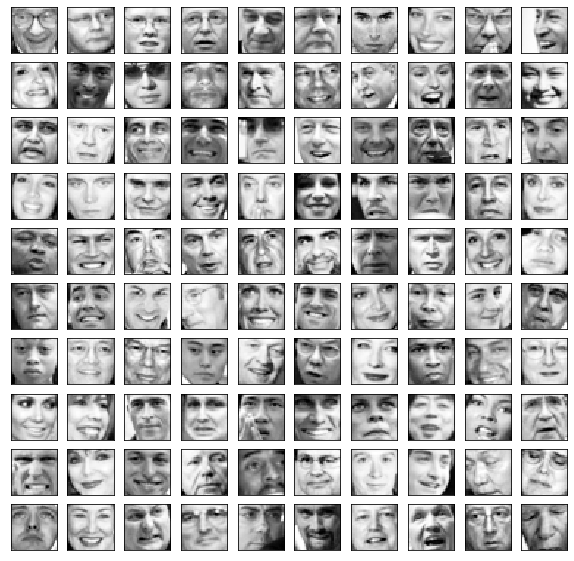

In [4]:
# 显示图像
plot_100_images(X)

## 3.对图像运用PCA降维

In [5]:
# 对X去均值化
means = np.mean(X,axis=0)
X_demean = X - means

# 计算协方差矩阵
Sigma = X_demean.T@X_demean

# 利用奇异值分解（SVD）来分解协方差矩阵
U,S,V = np.linalg.svd(Sigma)

In [6]:
# 实现降维
U1 = U[:,:36]
X_reduction = X_demean@U1
X_reduction.shape

(5000, 36)

In [7]:
X_recover = X_reduction@U1.T+means

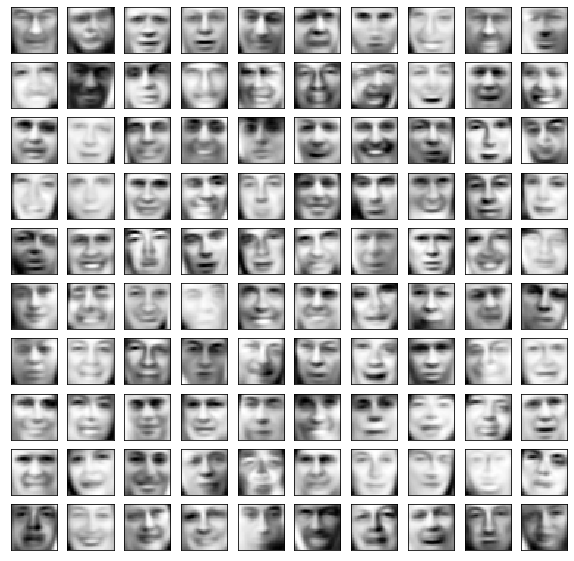

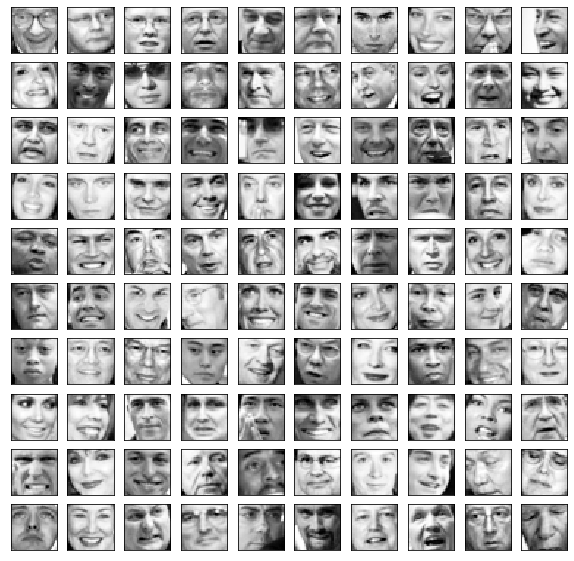

In [9]:
# 画图
plot_100_images(X_recover),plot_100_images(X)
plt.show()